# Implementing SVM and Random Forest to Predict Credit Card Approval

Using the [cleaned credit card dataset from UCI](https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data). We will use SVM and Random Forest Classifier in order to determine whether the person should be approved or rejected for credit. We will also see and compare how both algorithm perform.

## Importing libraries and grabbing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')

## EDA (Exploratory Data Analysis)

In [3]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [5]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [6]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

Since the data has been cleaned, there isn't really any missing or broken data that we should take care of, except for the categorial features.

Next, we will explore the features by visualizing them.

In [7]:
sns.set_style('whitegrid')

<Axes: xlabel='Approved', ylabel='count'>

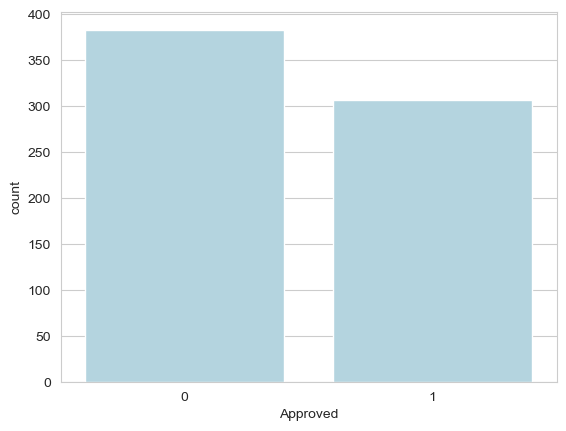

In [8]:
sns.countplot(x='Approved', data=df, color='lightblue')

<Axes: xlabel='Gender', ylabel='count'>

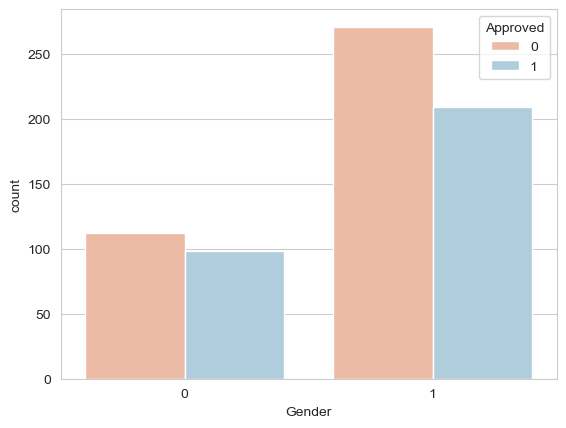

In [9]:
sns.countplot(x='Gender', data=df, hue='Approved', palette='RdBu')

<Axes: xlabel='Age', ylabel='Count'>

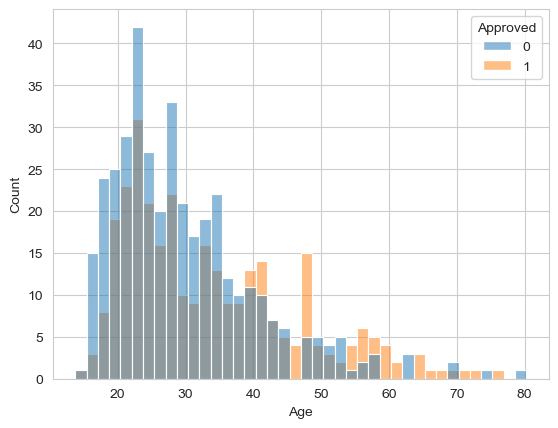

In [10]:
sns.histplot(x='Age', data= df, hue='Approved', bins=40)

Looks like there are more male (1) than female (0) in this dataset, and a lot of them are between the age of 20 - 40.

<Axes: xlabel='Married', ylabel='count'>

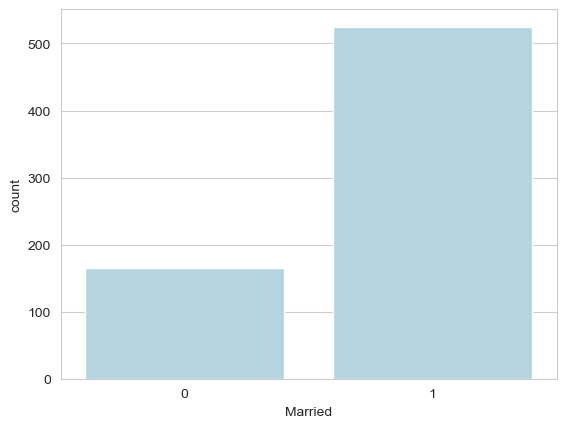

In [11]:
sns.countplot(x='Married', data= df, color='lightblue')

Most people in this dataset who apply for a credit card are married.

<Axes: xlabel='BankCustomer', ylabel='count'>

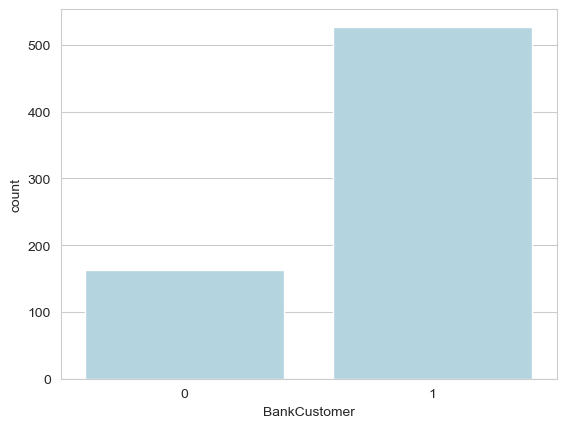

In [12]:
sns.countplot(x='BankCustomer', data= df, color='lightblue')

<Axes: xlabel='Employed', ylabel='count'>

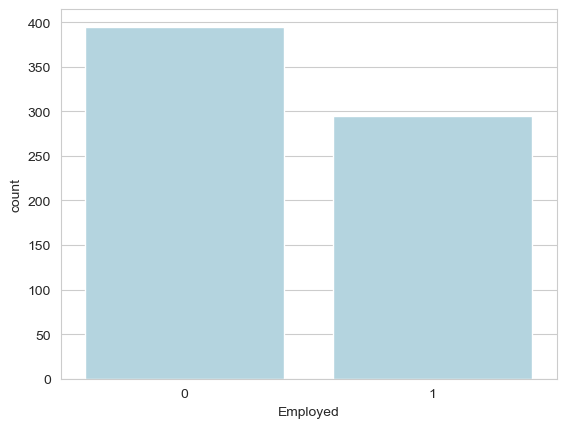

In [13]:
sns.countplot(x='Employed', data= df, color='lightblue')

<Axes: xlabel='YearsEmployed', ylabel='Count'>

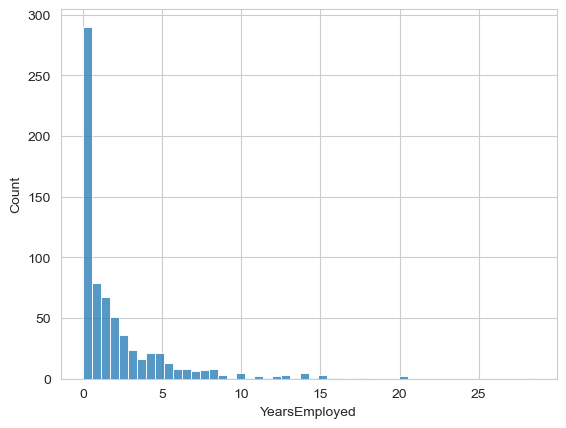

In [14]:
sns.histplot(x='YearsEmployed', data= df, bins= 50)

<Axes: xlabel='Industry', ylabel='count'>

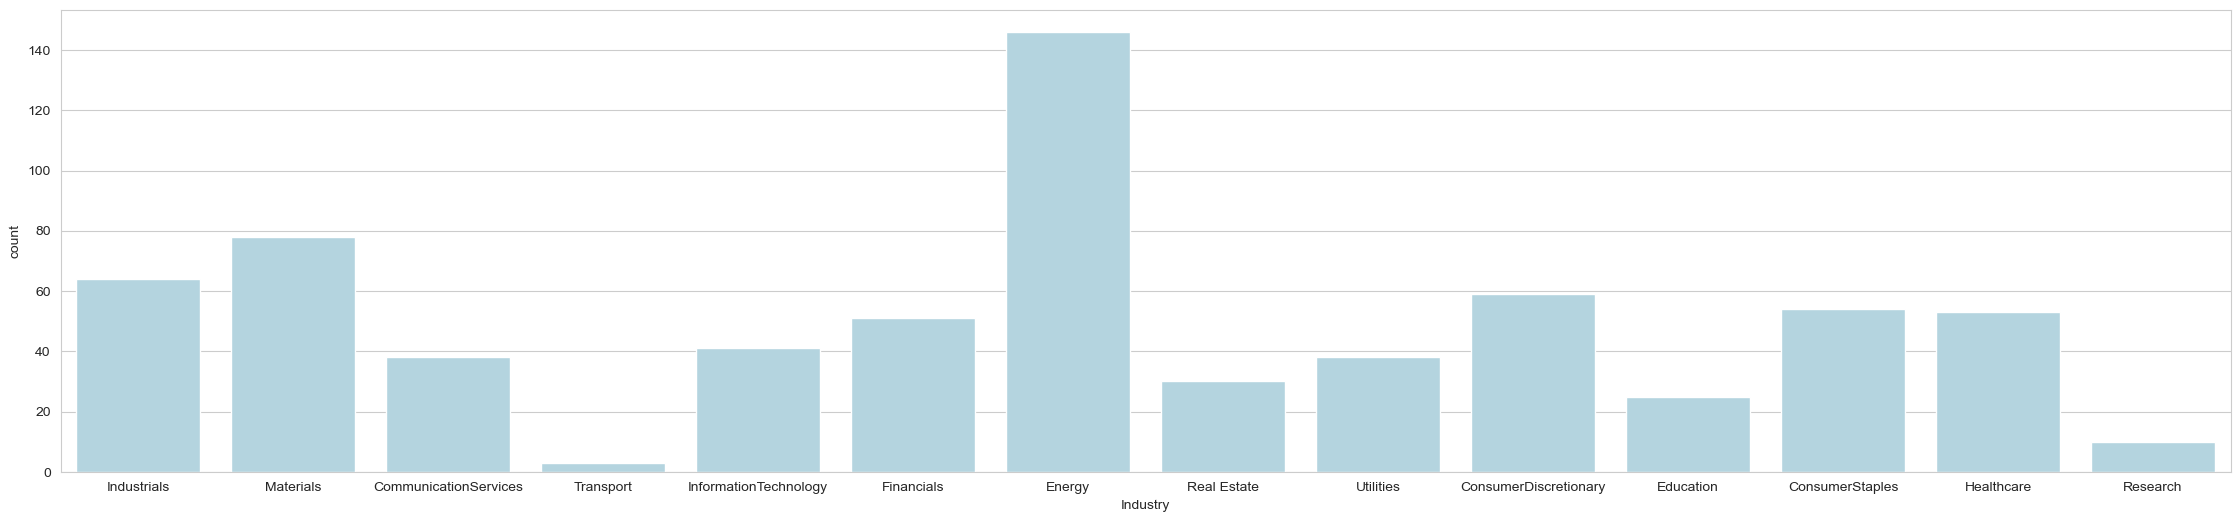

In [15]:
plt.figure(figsize=(28,6))
sns.countplot(x='Industry', data= df, color='lightblue')

<Axes: xlabel='Citizen', ylabel='count'>

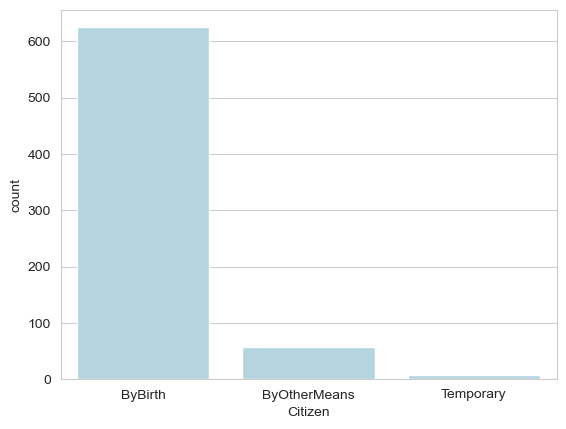

In [16]:
sns.countplot(x='Citizen', data= df, color='lightblue')

<Axes: xlabel='Ethnicity', ylabel='count'>

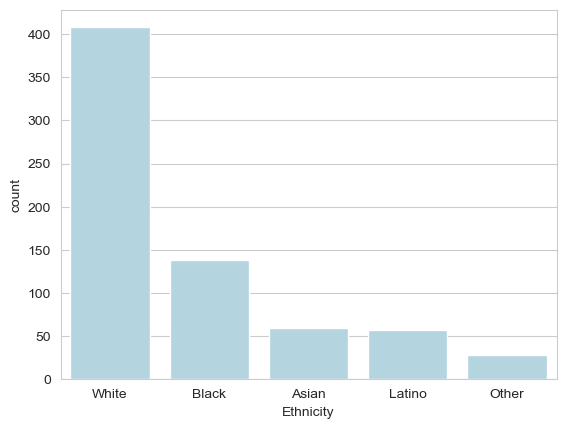

In [17]:
sns.countplot(x='Ethnicity', data= df, color='lightblue')

<Axes: xlabel='Debt', ylabel='Count'>

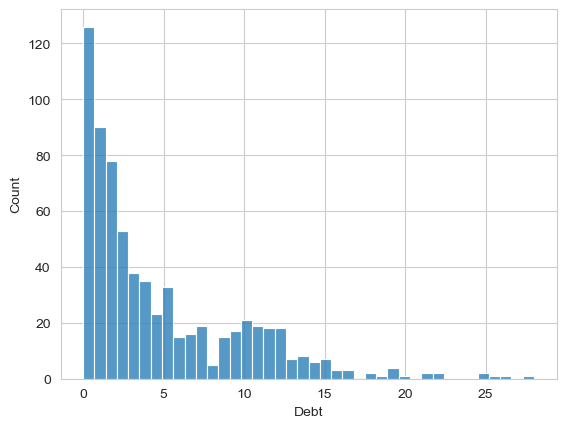

In [18]:
sns.histplot(x='Debt', data= df, bins=40)

Debt refers to Outstanding Debt, which has been scaled by the dataset provider.

<Axes: xlabel='PriorDefault', ylabel='count'>

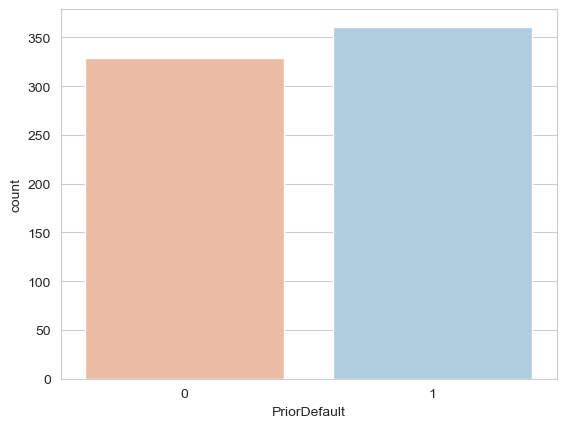

In [19]:
sns.countplot(x='PriorDefault', data= df, palette='RdBu', hue='PriorDefault', legend=False)

PriorDefault refers to whether the person has previously failed to pay their debt.

## Replacing Categorial Features

In [20]:
industry = pd.get_dummies(df['Industry'], drop_first=True, dtype='int')

In [21]:
ethnicity = pd.get_dummies(df['Ethnicity'], drop_first=True, dtype='int')

In [22]:
citizen = pd.get_dummies(df['Citizen'], drop_first=True, dtype='int')

In [23]:
industry.head()

,ConsumerDiscretionary,ConsumerStaples,Education,Energy,Financials,Healthcare,Industrials,InformationTechnology,Materials,Real Estate,Research,Transport,Utilities
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0


In [24]:
ethnicity.head()

,Black,Latino,Other,White
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [25]:
citizen.head()

,ByOtherMeans,Temporary
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


In [26]:
df = pd.concat([df, industry, ethnicity, citizen], axis=1)

In [27]:
df.drop(['Industry', 'Ethnicity', 'Citizen'], axis=1, inplace=True)

In [28]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Real Estate,Research,Transport,Utilities,Black,Latino,Other,White,ByOtherMeans,Temporary
0,1,30.83,0.000,1,1,1.25,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,58.67,4.460,1,1,3.04,1,1,6,0,...,0,0,0,0,1,0,0,0,0,0
2,0,24.50,0.500,1,1,1.50,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,27.83,1.540,1,1,3.75,1,1,5,1,...,0,0,0,0,0,0,0,1,0,0
4,1,20.17,5.625,1,1,1.71,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 690 non-null    int64  
 1   Age                    690 non-null    float64
 2   Debt                   690 non-null    float64
 3   Married                690 non-null    int64  
 4   BankCustomer           690 non-null    int64  
 5   YearsEmployed          690 non-null    float64
 6   PriorDefault           690 non-null    int64  
 7   Employed               690 non-null    int64  
 8   CreditScore            690 non-null    int64  
 9   DriversLicense         690 non-null    int64  
 10  ZipCode                690 non-null    int64  
 11  Income                 690 non-null    int64  
 12  Approved               690 non-null    int64  
 13  ConsumerDiscretionary  690 non-null    int32  
 14  ConsumerStaples        690 non-null    int32  
 15  Educat

## Using SVM for classification

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('Approved', axis=1)
y = df['Approved']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.svm import SVC

In [34]:
model = SVC()

In [35]:
model.fit(X_train, y_train)

SVC()

In [36]:
predictions = model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.95      0.73       110
           1       0.81      0.26      0.39        97

    accuracy                           0.62       207
   macro avg       0.70      0.60      0.56       207
weighted avg       0.69      0.62      0.57       207



In [39]:
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
data = {'Actual Negative': [TN, FP], 'Actual Positive': [FN, TP]}
index = ['Predicted Negative', 'Predicted Positive']
confusion_m = pd.DataFrame(data, index=index)
confusion_m

,Actual Negative,Actual Positive
Predicted Negative,104,72
Predicted Positive,6,25


In [40]:
print(accuracy_score(y_test, predictions))

0.6231884057971014


It looks like SVM has an accuracy of about 0.62.

let's see if using Random Forest will yield a better result.

## Using Random Forest for classification

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(random_state=101)

In [43]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [44]:
rfc_predictions = rfc.predict(X_test)

In [45]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.83      0.82      0.83        97

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207



In [46]:
TN, FP, FN, TP = confusion_matrix(y_test, rfc_predictions).ravel()
data = {'Actual Negative': [TN, FP], 'Actual Positive': [FN, TP]}
index = ['Predicted Negative', 'Predicted Positive']
confusion_m = pd.DataFrame(data, index=index)
confusion_m

,Actual Negative,Actual Positive
Predicted Negative,94,17
Predicted Positive,16,80


In [47]:
print(accuracy_score(y_test, rfc_predictions))

0.8405797101449275


The algorithm gives us an accuracy of 0.84, which is huge improvement form using SVM!

Next, we should check the feature importance and see if we can improve our model's accuracy.

## Feature Importance
Feature importance tells us about how much a feature contribute to the model's performance. 

By knowing the feature's importance, we gain information on the relationship between the feature and the target variable. We can also do feature selection to possibly increase our model's performance.

In [48]:
rfc.feature_importances_

array([1.28987773e-02, 7.56048656e-02, 8.10264863e-02, 1.29644491e-02,
       1.21990900e-02, 1.15070469e-01, 2.31966682e-01, 5.98337149e-02,
       9.87501658e-02, 1.34271884e-02, 6.16759206e-02, 8.83590282e-02,
       7.02180312e-03, 6.04590575e-03, 2.55768179e-03, 8.74711578e-03,
       9.43973548e-03, 8.65006686e-03, 7.17169644e-03, 9.10052854e-03,
       1.04689764e-02, 5.54153318e-03, 5.86916542e-04, 1.03733529e-05,
       1.10385608e-02, 1.21120888e-02, 9.15259111e-03, 2.88208381e-03,
       1.00824337e-02, 6.74955136e-03, 8.86351992e-03])

In [49]:
feature_importance = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending=False)

In [50]:
feature_importance.head()

PriorDefault     0.231967
YearsEmployed    0.115070
CreditScore      0.098750
Income           0.088359
Debt             0.081026
dtype: float64

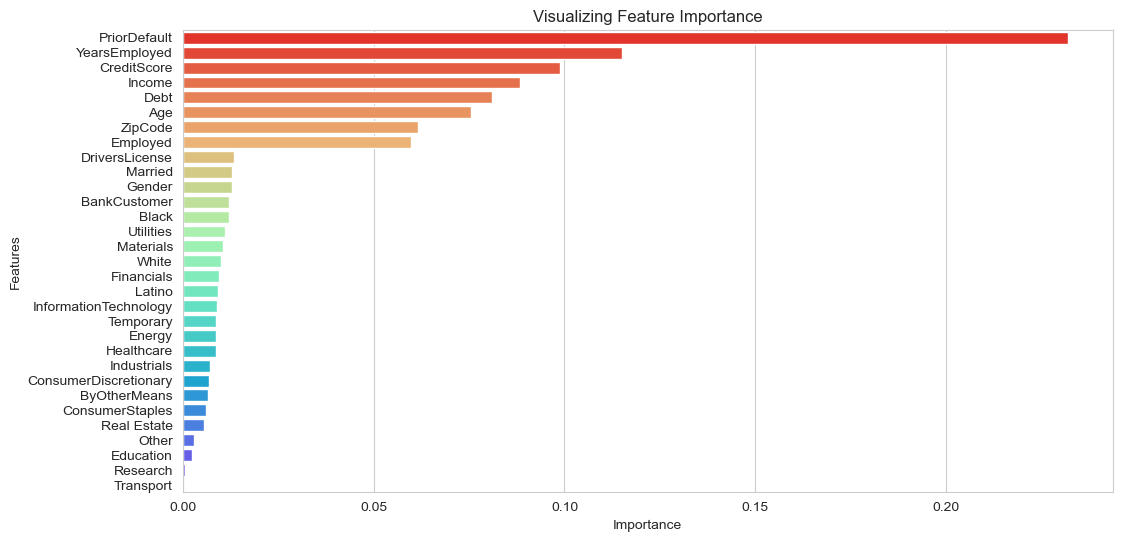

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(x= feature_importance, y= feature_importance.index, palette='rainbow_r', hue=feature_importance.index, legend=False)
plt.title('Visualizing Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

It looks like PriorDefault contributes the highest on determining whether a person's credit card is approved or not, which make sense.

From the graph, it looks like there are 2 features that contribute very small towards our model. Lets see if removing them has any effect on our model.

There is also a very sharp jump of importance on features above 'DriverLicense'.

## Building the Random Forest model on selected features

### Removing 2 features with the lowest importance
We will try to remove the 2 features with the lowest importance (Transport and Research) and see how it impact our model.

In [52]:
X = X.drop(['Research', 'Transport'], axis=1)
y = df['Approved']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
rfc = RandomForestClassifier(random_state=101)

In [55]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [56]:
rfc_predictions = rfc.predict(X_test)

In [57]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       110
           1       0.84      0.85      0.84        97

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



In [58]:
TN, FP, FN, TP = confusion_matrix(y_test, rfc_predictions).ravel()
data = {'Actual Negative': [TN, FP], 'Actual Positive': [FN, TP]}
index = ['Predicted Negative', 'Predicted Positive']
confusion_m = pd.DataFrame(data, index=index)
confusion_m

,Actual Negative,Actual Positive
Predicted Negative,94,15
Predicted Positive,16,82


In [59]:
print(accuracy_score(y_test, rfc_predictions))

0.8502415458937198


It looks like the accuracy improved by around 0.01.

### Removing features with importance under 0.05
Previously we notice that there's a huge jump in importance. Let's try to remove those with importance under 0.05 and see how our new model performs.

In [60]:
X = df[['PriorDefault', 'YearsEmployed', 'CreditScore', 'Income', 'Debt', 'Age', 'ZipCode', 'Employed']]
y = df['Approved']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
rfc = RandomForestClassifier(random_state=101)

In [63]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [64]:
rfc_predictions = rfc.predict(X_test)

In [65]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.85      0.85      0.85        97

    accuracy                           0.86       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.86      0.86      0.86       207



In [66]:
TN, FP, FN, TP = confusion_matrix(y_test, rfc_predictions).ravel()
data = {'Actual Negative': [TN, FP], 'Actual Positive': [FN, TP]}
index = ['Predicted Negative', 'Predicted Positive']
confusion_m = pd.DataFrame(data, index=index)
confusion_m

,Actual Negative,Actual Positive
Predicted Negative,95,15
Predicted Positive,15,82


In [67]:
print(accuracy_score(y_test, rfc_predictions))

0.855072463768116


It looks like by removing those features under 0.05 importance, our model's accuracy improved by 0.005

# Conclusion

- In this project, we have successfully build 2 models, **SVC and Random Forest Classifier**, and used them to predict credit card approval based on the dataset given.
- The SVC model gave an accuracy of **0.623**, which is better than coin flipping, but has a lot of room to improve.
- The Random Forest Classifier gave us an accuracy of **0.840** which we later improved by features selection, resulting in an **increase to 0.850 and 0.855** depending on how we decide to remove certain features.
- Some deeper exploration such as domain knowledge towards the features and future analysis with other test datasets might be needed to see **if the feature removal actually has a positive impact** towards prediction.

Thank you for your attention! I hope you find this project useful and enjoyable.